In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

import sys
if "../" not in sys.path:
  sys.path.append("../")

import gym
# import plotting
from lib.envs.cliff_walking import CliffWalkingEnv
import itertools
matplotlib.style.use('ggplot')

In [3]:
env = CliffWalkingEnv()

In [4]:
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [9]:
state = env.reset()
print env.render()
env.step(0)
print env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

None
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

None


## Q-Learning

In [9]:
# Create a random epsilon-greedy policy

def random_epsilon_greedy_policy(Q, epsilon, state, nA):
    A = np.ones(nA, dtype=float) * epsilon / nA
    best_action = np.argmax(Q[state])
    A[best_action] += (1.0 - epsilon)
    return A

In [16]:
def q_learning(env, num_episodes, discount=1.0, alpha=0.5, epsilon=0.1, debug=False):
    
    Q = defaultdict(lambda: np.zeros(env.action_space.n, dtype=float))
    
    episode_lengths = defaultdict(float)
    episode_rewards = defaultdict(float)
    

    for i_episode in range(1, num_episodes+1):
        
        if debug:
            if i_episode % 100 == 0:
                print("\rEpisode {}/{}.".format(i_episode, num_episodes))
                
        state = env.reset()
        for t in itertools.count():
            action_probs = random_epsilon_greedy_policy(Q, epsilon, state, env.action_space.n)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            
            next_state, reward, end, _ = env.step(action)
            
            Q[state][action] += alpha * (reward + discount*np.max(Q[next_state][:]) - Q[state][action])
            
            episode_rewards[i_episode] += reward
            episode_lengths[i_episode] = t
            
            if end:
                break
            state = next_state
            
    return Q, episode_lengths, episode_rewards

In [17]:
Q, episode_lengths, episode_rewards = q_learning(env, 500, debug=True)

Episode 100/500.
Episode 200/500.
Episode 300/500.
Episode 400/500.
Episode 500/500.


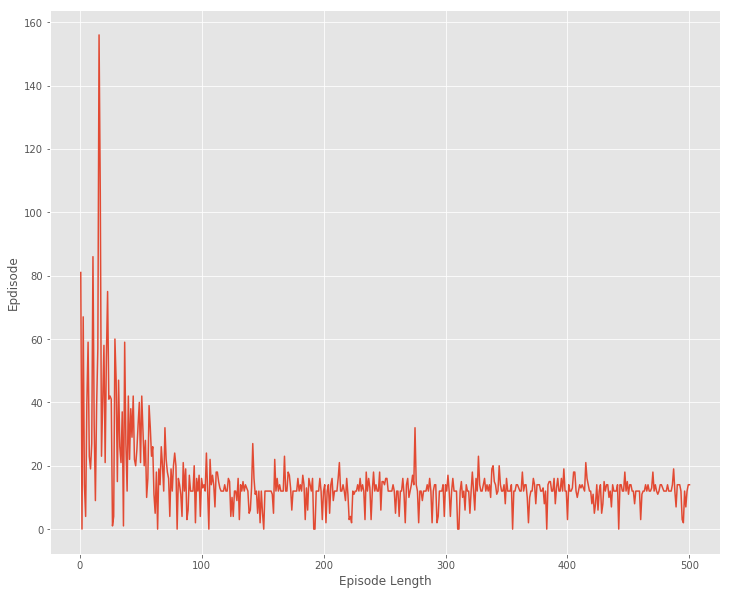

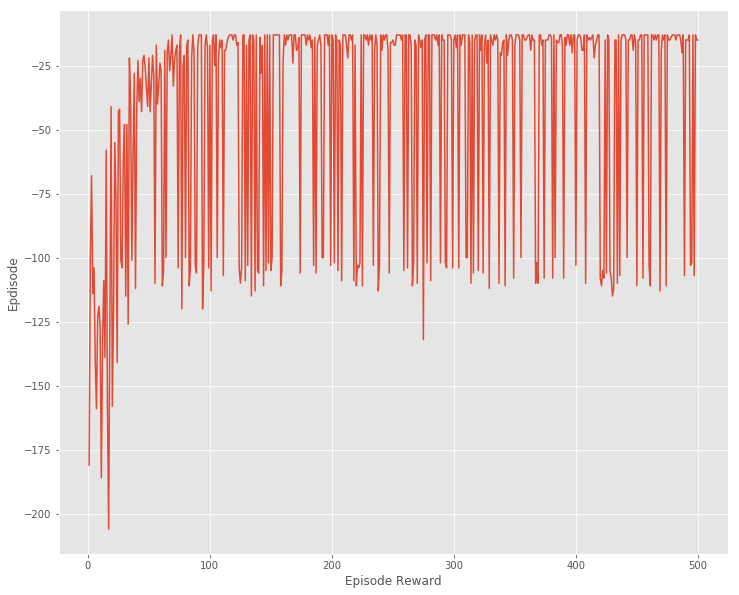

In [19]:
plt.figure(1, figsize=(12,10))
plt.plot(episode_lengths.keys(), episode_lengths.values())
plt.xlabel('Episode Length')
plt.ylabel('Epdisode')

plt.figure(2, figsize=(12,10))
plt.plot(episode_rewards.keys(), episode_rewards.values())
plt.xlabel('Episode Reward')
plt.ylabel('Epdisode')